# Problem 2: Newsgroups

The code for this single-layer perceptron can be found in `newsgroups.py`. The module `utils.py` contains helper functions to load the dataset, display progress bar, plot graphs, etc.

In [1]:
import sys
sys.path.append('../src/')
from newsgroups_v2 import *

---
## Building the Model

We initialize the parameters of the single-layer MLP.

In [2]:
# Model parameters
batch_size = 64
layers = [61188, 100, 20]
learning_rate = 1e-4
momentum = 0.9
eps = 1e-5
train_filename = "../data/newsgroups/matlab/train"
test_filename = "../data/newsgroups/matlab/test"
saved = "../data/newsgroups/saved/"
train_size = 11269
test_size = 7505

Next, we define a learning rate grid search for our model.

In [3]:
lr_search = [1e-2, 1e-3, 1e-4, 1e-5]
nb_epochs = 20

We can now load different datasets for each preprocessing methods. Since loading all three datasets at once requires a huge amount of memory, we load them sequentially by clearing out the memory inbetween each procedure.

### No Preprocessing

In [4]:
# Load dataset without any preprocessing (count vector)
train_data, test_data = load_newsgroups(train_filename, test_filename, 
                                layers[0], train_size, test_size, "count")
train_loader = DataLoader(train_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

In [18]:
# Compile and train model
train_acc = torch.zeros((len(lr_search), nb_epochs))
test_acc = torch.zeros((len(lr_search), nb_epochs))

# Learning rate grid search
for i, lr in enumerate(lr_search):
    print("{}\nLearning rate = {:.5f}\n{}".format("="*30, lr, "-"*30))
    mlp_n = Newsgroups(layers, lr, momentum)
    _, tr_acc, te_acc = mlp_n.train(nb_epochs, train_loader, test_loader)
    train_acc[i], test_acc[i] = torch.FloatTensor(tr_acc), torch.FloatTensor(te_acc)

Learning rate = 0.1000
------------------------------
Epoch 1/20
Avg loss: 10.6031 -- Train acc: 0.0429 -- Test acc: 0.0440
Epoch 2/20
Avg loss: 49.2482 -- Train acc: 0.0432 -- Test acc: 0.0438
Epoch 3/20
Avg loss: 14.5802 -- Train acc: 0.0438 -- Test acc: 0.0436
Epoch 4/20
Avg loss: 28.4527 -- Train acc: 0.0433 -- Test acc: 0.0429
Epoch 5/20
Avg loss: 35.4696 -- Train acc: 0.0453 -- Test acc: 0.0442
Epoch 6/20
Avg loss: 4.5944 -- Train acc: 0.0448 -- Test acc: 0.0438
Epoch 7/20
Avg loss: 4.5434 -- Train acc: 0.0472 -- Test acc: 0.0454
Epoch 8/20
Avg loss: 4.5240 -- Train acc: 0.0598 -- Test acc: 0.0580
Epoch 9/20
Avg loss: 4.5122 -- Train acc: 0.0453 -- Test acc: 0.0440
Epoch 10/20
Avg loss: 4.5002 -- Train acc: 0.0621 -- Test acc: 0.0593
Epoch 11/20
Avg loss: 4.4584 -- Train acc: 0.0635 -- Test acc: 0.0596
Epoch 12/20
Avg loss: 4.4764 -- Train acc: 0.0553 -- Test acc: 0.0514
Epoch 13/20
Avg loss: 4.4854 -- Train acc: 0.0653 -- Test acc: 0.0612
Epoch 14/20
Avg loss: 40.7465 -- Train a

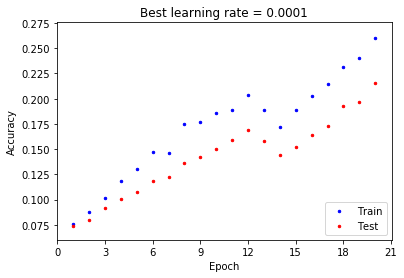

In [19]:
# Find best learning rate
best_lr_idx = test_acc.max(1)[0].max(0)[1][0]
best_lr = lr_search[best_lr_idx]

# Plot accuracy per epoch for this learning rate
plots_per_epoch([train_acc[best_lr_idx], test_acc[best_lr_idx]], 
    ["Train", "Test"], "Accuracy", "Count: Best learning rate = {}".format(best_lr))

### TF-IDF

In [4]:
# Load dataset with tf-idf preprocessing (tf-idf vector)
train_data, test_data = load_newsgroups(train_filename, test_filename, 
                                layers[0], train_size, test_size, "tfidf")
train_loader = DataLoader(train_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

In [11]:
# Compile and train model
train_acc = torch.zeros((len(lr_search), nb_epochs))
test_acc = torch.zeros((len(lr_search), nb_epochs))

# Learning rate grid search
for i, lr in enumerate(lr_search):
    print("{}\nLearning rate = {:.5f}\n{}".format("="*30, lr, "-"*30))
    mlp_t = Newsgroups(layers, lr, momentum)
    _, tr_acc, te_acc = mlp_t.train(nb_epochs, train_loader, test_loader)
    train_acc[i], test_acc[i] = torch.FloatTensor(tr_acc), torch.FloatTensor(te_acc)

Learning rate = 0.10000
------------------------------
Epoch 1/20
Avg loss: 77.7257 -- Train acc: 0.0434 -- Test acc: 0.0430
Epoch 2/20
Avg loss: 6.2442 -- Train acc: 0.0439 -- Test acc: 0.0425
Epoch 3/20
Avg loss: 46.0783 -- Train acc: 0.0440 -- Test acc: 0.0429
Epoch 4/20
Avg loss: 340.2365 -- Train acc: 0.0433 -- Test acc: 0.0425
Epoch 5/20
Avg loss: 1305.3649 -- Train acc: 0.0476 -- Test acc: 0.0449
Epoch 6/20
Avg loss: 7452.3127 -- Train acc: 0.0556 -- Test acc: 0.0502
Epoch 7/20
Avg loss: 4.5735 -- Train acc: 0.0621 -- Test acc: 0.0534
Epoch 8/20
Avg loss: 4.8432 -- Train acc: 0.0518 -- Test acc: 0.0449
Epoch 9/20
Avg loss: 8.2525 -- Train acc: 0.0523 -- Test acc: 0.0474
Epoch 10/20
Avg loss: 4.5802 -- Train acc: 0.0508 -- Test acc: 0.0454
Epoch 11/20
Avg loss: 4.5033 -- Train acc: 0.0508 -- Test acc: 0.0456
Epoch 12/20
Avg loss: 4.5034 -- Train acc: 0.0508 -- Test acc: 0.0456
Epoch 13/20
Avg loss: 4.5037 -- Train acc: 0.0509 -- Test acc: 0.0456
Epoch 14/20
Avg loss: 4.5324 -- Tr

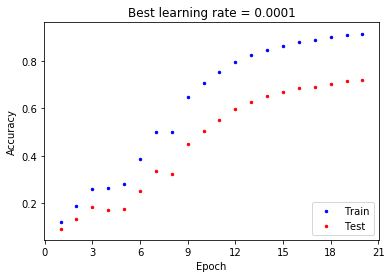

In [12]:
# Find best learning rate
best_lr_idx = test_acc.max(1)[0].max(0)[1][0]
best_lr = lr_search[best_lr_idx]

# Plot accuracy per epoch for this learning rate
plots_per_epoch([train_acc[best_lr_idx], test_acc[best_lr_idx]], 
    ["Train", "Test"], "Accuracy", "TF-IDF: Best learning rate = {}".format(best_lr))

### Standardization

In [4]:
# Load dataset with standardization preprocessing, given epsilon
train_data, test_data = load_newsgroups(train_filename, test_filename, 
                                layers[0], train_size, test_size, "stand", 1e-5)
train_loader = DataLoader(train_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

In [6]:
# Compile and train model
train_acc = torch.zeros((len(lr_search), nb_epochs))
test_acc = torch.zeros((len(lr_search), nb_epochs))

# Learning rate grid search
for i, lr in enumerate(lr_search):
    print("{}\nLearning rate = {:.5f}\n{}".format("="*30, lr, "-"*30))
    mlp_t = Newsgroups(layers, lr, momentum)
    _, tr_acc, te_acc = mlp_t.train(nb_epochs, train_loader, test_loader)
    train_acc[i], test_acc[i] = torch.FloatTensor(tr_acc), torch.FloatTensor(te_acc)

Learning rate = 0.00001
------------------------------
Epoch 1/20
Avg loss: 3.2956 -- Train acc: 0.0624 -- Test acc: 0.0531
Epoch 2/20
Avg loss: 3.2021 -- Train acc: 0.0734 -- Test acc: 0.0588
Epoch 3/20
Avg loss: 3.1158 -- Train acc: 0.0865 -- Test acc: 0.0655
Epoch 4/20
Avg loss: 3.0357 -- Train acc: 0.1036 -- Test acc: 0.0706
Epoch 5/20
Avg loss: 2.9608 -- Train acc: 0.1218 -- Test acc: 0.0772
Epoch 6/20
Avg loss: 2.8902 -- Train acc: 0.1406 -- Test acc: 0.0830
Epoch 7/20
Avg loss: 2.8238 -- Train acc: 0.1629 -- Test acc: 0.0906
Epoch 8/20
Avg loss: 2.7612 -- Train acc: 0.1828 -- Test acc: 0.0972
Epoch 9/20
Avg loss: 2.7020 -- Train acc: 0.2044 -- Test acc: 0.1042
Epoch 10/20
Avg loss: 2.6459 -- Train acc: 0.2270 -- Test acc: 0.1132
Epoch 11/20
Avg loss: 2.5924 -- Train acc: 0.2493 -- Test acc: 0.1221
Epoch 12/20
Avg loss: 2.5411 -- Train acc: 0.2742 -- Test acc: 0.1307
Epoch 13/20
Avg loss: 2.4918 -- Train acc: 0.2973 -- Test acc: 0.1404
Epoch 14/20
Avg loss: 2.4445 -- Train acc: 0

KeyboardInterrupt: 

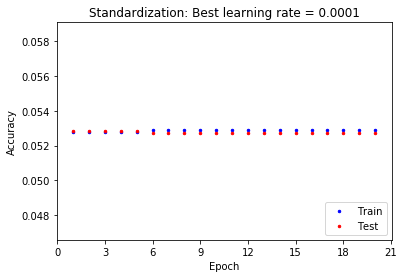

In [6]:
# Find best learning rate
best_lr_idx = test_acc.max(1)[0].max(0)[1][0]
best_lr = lr_search[best_lr_idx]

# Plot accuracy per epoch for this learning rate
plots_per_epoch([train_acc[best_lr_idx], test_acc[best_lr_idx]], 
    ["Train", "Test"], "Accuracy", "Standardization: Best learning rate = {}".format(best_lr))

### Discussion

**(a)**

**(b)** If $\epsilon = 0$ then a word in the vocabulary that never appears in any document will cause a division by zero. In PyTorch, this gives `inf` entries in the training set which causes problem when updating the weights. In order to resolve this issue, we can remove all zero-contribution words in the vocab such that $\sigma_{\text{train}} \neq 0$ for all words.
 
**(c)** The tf-idf representation gives more "weight" to words that are rare. In some sense, tf-idf disregards words that have low impact (e.g. "the", "a", "and") in the classification because they are common, and identifies rare occurences.

---
## Variance in training

In [4]:
# Load tfidf dataset
train_data, test_data = load_newsgroups(train_filename, test_filename, 
                                layers[0], train_size, test_size, "tfidf")
learning_rate = 0.2

In [6]:
batch_size = 1
train_loader = DataLoader(train_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

In [7]:
mlp_t = Newsgroups(layers, learning_rate, momentum)
train_loss, train_acc, test_acc = mlp_t.train(1, train_loader, test_loader, 5000)

Epoch 1/1
Update    0/5000 -- Cur Loss: 1.9969
Update  100/5000 -- Cur Loss: 0.0000
Update  200/5000 -- Cur Loss: 0.0000
Update  300/5000 -- Cur Loss: 0.0000
Update  400/5000 -- Cur Loss: 0.0000
Update  500/5000 -- Cur Loss: 0.0000
Update  600/5000 -- Cur Loss: 0.0000


KeyboardInterrupt: 

In [7]:
print(train_loss)

NameError: name 'train_loss' is not defined

In [8]:
batch_size = 100
train_loader = DataLoader(train_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

In [10]:
train_loss, train_acc, test_acc = mlp_t.train(100, train_loader, test_loader, 5000)

Epoch 1/100
Update    0/5000 -- Cur Loss: 5.8199
Update  100/5000 -- Cur Loss: 6.6925
Epoch 2/100
Update  200/5000 -- Cur Loss: 6.3561
Epoch 3/100
Update  300/5000 -- Cur Loss: 4.9169


KeyboardInterrupt: 

In [ ]:
train_loss

In [ ]:
plot_per_epoch(train_loss, "Loss", "Vochier")